## Example of ema_strategy

Suppose we want to test the Apple Inc. stock with the exponantial moving average trading strategy in the period of **2010-01-01 to 2019-01-01**. Firstly, we define the short ema line period to be 14 days, and long ema line period to be 26 days. The trading occur when the long ema line intercross with the short ema line. In order to make avoid too noisy signals, a tolerance day was added. That means when the short ema line surpass the long ema line for at least the number of tolerance days, the stock would be bought. Otherwise, there will be no action taken. At the other side, when the long ema line surpass the short ema line for at least the number of tolerance days, the stock would be sold.

Also, the commission rate was one of a crucial factors for trading. In the model, we define the commission rate as 0.25% of the trading amount. For illustration purpose, Short selling was not allowed in this example. The train test ratio is for other model testing purpose. In our case, we can choose 0 as all data are for testing.

In [5]:
#import all the libraries.
import seaborn as sns
import plotly.express as px
import datapackage
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from ema_strategy import ema_strategy
%matplotlib inline

### Test statistics

In [18]:
#define the parameters
start = '2010-01-01'
end = '2019-01-01'
ticker = 'AAPL'
ema_short = 14
ema_long = 26
tolerance_day = 2
commission = 0.25
short_sell = False
train_test_ratio = 0.999   # domain = (0 to 1)

#define the model
model = ema_strategy(start,end,ticker,train_test_ratio)

#load the data to data loader of the model
df_train, df_test = model.data_loader(ema_short, ema_long, tolerance_day, commission, short_sell)
df_test = model.strategy(df_test)

In [20]:
statistics = model.trade_statistics(df_test)

Total number of trading days = 2262
Number of years = 8.9
Trasaction Number = 64
Transaction per Year = 7.19
Win Ratio = 46.87354%
Maximum Drawdown = 0.00000%
Maximum Return = 176.59204%
Sharpe Ratio = 1.60167
Underlying Total Return = 415.05738%
Underlying Annualized Return = 20.22195%
Model Total Return = 169.11538%
Model Annualized Return = 11.76548%


##### From the above test statistics, we can see some of the important metrics including the win ratio, sharpe ratio, maximum drawdown and total return or anualized return. For easy comparison, the underlying asset returns are also shown.

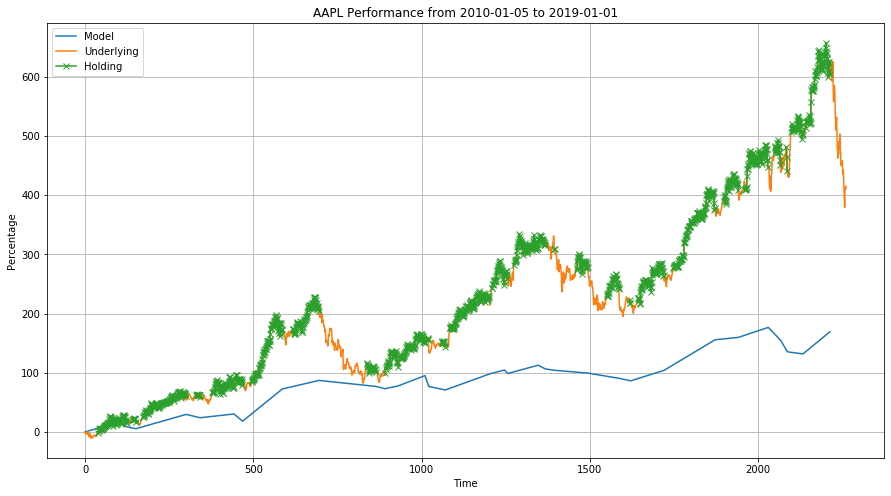

In [16]:
model.plot_under_model(df_test, ' Testing')

##### The above graph showed the model performance, the underlying performance and the holding period of the stock by the model.
